## Importamos librerías

In [1]:
from keras.datasets import imdb
from keras import models, layers, optimizers
import numpy as np


## Descargamos los datos de imdb - Keras

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\joaqu\anaconda3\envs\book\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\joaqu\anaconda3\envs\book\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant t

In [3]:
#train_data[0]

In [4]:
train_labels[1]

0

### Diccionario de palabras

In [5]:
word_index = imdb.get_word_index()
word_index = dict([(value,key) for (key,value) in word_index.items()])

In [6]:
#for _ in train_data[0]:
#    print(word_index.get( _ - 3))

## Función de one-hot encoding

In [7]:
def vectorizar(sequences, dim=10000):
    restults = np.zeros((len(sequences),dim))
    for i, sequences in enumerate(sequences):
        restults[i,sequences]=1
    return restults    

## Transformamos datos

In [8]:
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

In [9]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Creamos el modelo

In [10]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['acc'])

In [12]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train =  y_train[10000:]

## Entrenando

In [13]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=7,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/7
30/30 [==============================] - 1s 23ms/step - loss: 0.5140 - acc: 0.7930 - val_loss: 0.3932 - val_acc: 0.8690
Epoch 2/7
30/30 [==============================] - 0s 12ms/step - loss: 0.3142 - acc: 0.9001 - val_loss: 0.3184 - val_acc: 0.8754
Epoch 3/7
30/30 [==============================] - 0s 12ms/step - loss: 0.2299 - acc: 0.9271 - val_loss: 0.3017 - val_acc: 0.8766
Epoch 4/7
30/30 [==============================] - 0s 12ms/step - loss: 0.1822 - acc: 0.9407 - val_loss: 0.2956 - val_acc: 0.8808
Epoch 5/7
30/30 [==============================] - 0s 12ms/step - loss: 0.1501 - acc: 0.9515 - val_loss: 0.2778 - val_acc: 0.8878
Epoch 6/7
30/30 [==============================] - 0s 12ms/step - loss: 0.1236 - acc: 0.9615 - val_loss: 0.2895 - val_acc: 0.8859
Epoch 7/7
30/30 [==============================] - 0s 11ms/step - loss: 0.1029 - acc: 0.9675 - val_loss: 0.3074 - val_acc: 0.8845


## Analizamos resultados

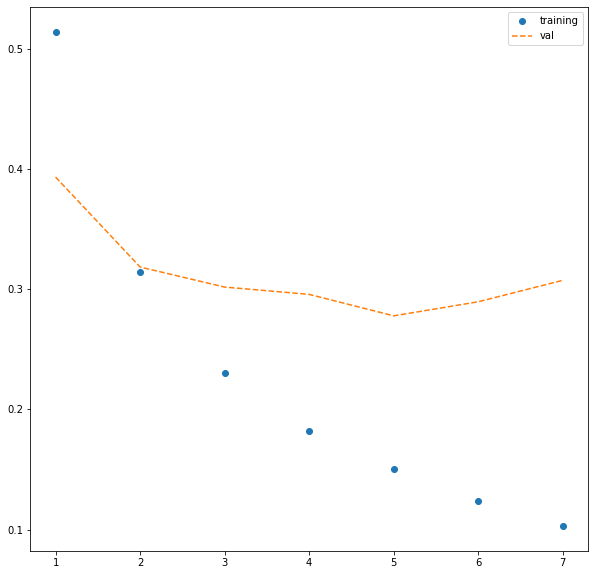

In [14]:
import matplotlib.pyplot as plt 

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,loss_values, 'o',label='training')
plt.plot(epoch,val_loss_values, '--',label='val')
plt.legend()
plt.show()

In [15]:
model.evaluate(x_test, y_test)[1]*100

782/782 [==============================] - 1s 1ms/step - loss: 0.3342 - acc: 0.8728


87.28399872779846

## Predicciones

In [16]:
predictions = model.predict(x_test)

In [17]:
predictions[1]

array([0.99966663], dtype=float32)